# **Analisis performa Harian, Mingguan, Bulanan**

# **💾 The data**

Setiap baris dalam tabel mewakili data operasional untuk satu mesin pada hari tertentu :



**Latar Belakang**

Mengurangi waktu mesin berhenti sangat penting agar produksi tetap berjalan sesuai jadwal, terutama dalam pembuatan komponen logam yang presisi. Dengan memprediksi kapan mesin akan rusak, perawatan bisa dilakukan lebih awal, sehingga proses kerja menjadi lebih efisien. Laporan ini menjelaskan cara kerja dan hasil dari model prediksi yang dibuat untuk memperkirakan kerusakan mesin berdasarkan data operasional sebelumnya.

# **Eksplorasi dan Praproses Data**

**Import Library**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

**Load Dataset dan Overview**

In [ ]:
# Load dataset
df = pd.read_csv('machine_downtime.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Date                         2500 non-null   object 
 1   Machine_ID                   2500 non-null   object 
 2   Assembly_Line_No             2500 non-null   object 
 3   Hydraulic_Pressure(bar)      2490 non-null   float64
 4   Coolant_Pressure(bar)        2481 non-null   float64
 5   Air_System_Pressure(bar)     2483 non-null   float64
 6   Coolant_Temperature          2488 non-null   float64
 7   Hydraulic_Oil_Temperature    2484 non-null   float64
 8   Spindle_Bearing_Temperature  2493 non-null   float64
 9   Spindle_Vibration            2489 non-null   float64
 10  Tool_Vibration               2489 non-null   float64
 11  Spindle_Speed(RPM)           2494 non-null   float64
 12  Voltage(volts)               2494 non-null   float64
 13  Torque(Nm)        

In [ ]:
df.head()

,Date,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature,Spindle_Bearing_Temperature,Spindle_Vibration,Tool_Vibration,Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime
0,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure
1,31-12-2021,Makino-L1-Unit1-2013,Shopfloor-L1,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure
2,31-12-2021,Makino-L3-Unit1-2015,Shopfloor-L3,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure
3,31-05-2022,Makino-L2-Unit1-2015,Shopfloor-L2,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure
4,31-03-2022,Makino-L1-Unit1-2013,Shopfloor-L1,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure


**Dataset Overview:**

Total data entri: 2,500

Fitur: 16

# **2.2. Data Cleaning**

**Handling Missing Values:** Assess and handle missing data via imputation or removal.

In [ ]:
print(df.isnull().sum())

Date                            0
Machine_ID                      0
Assembly_Line_No                0
Hydraulic_Pressure(bar)        10
Coolant_Pressure(bar)          19
Air_System_Pressure(bar)       17
Coolant_Temperature            12
Hydraulic_Oil_Temperature      16
Spindle_Bearing_Temperature     7
Spindle_Vibration              11
Tool_Vibration                 11
Spindle_Speed(RPM)              6
Voltage(volts)                  6
Torque(Nm)                     21
Cutting(kN)                     7
Downtime                        0
dtype: int64


**Date Processing:** Convert 'Date' to datetime and extract relevant features.

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Fill missing numerical values with median
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Convert 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Extract day, month, and day of the week
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['DayOfWeek'] = df['Date'].dt.dayofweek

# Drop original 'Date' column
df.drop('Date', axis=1, inplace=True)

# Encode categorical variables using Label Encoding
le = LabelEncoder()
df['Machine_ID'] = le.fit_transform(df['Machine_ID'])
df['Assembly_Line_No'] = le.fit_transform(df['Assembly_Line_No'])

In [ ]:
df.head()


,Machine_ID,Assembly_Line_No,Hydraulic_Pressure(bar),Coolant_Pressure(bar),Air_System_Pressure(bar),Coolant_Temperature,Hydraulic_Oil_Temperature,Spindle_Bearing_Temperature,Spindle_Vibration,Tool_Vibration,Spindle_Speed(RPM),Voltage(volts),Torque(Nm),Cutting(kN),Downtime,Day,Month,DayOfWeek
0,0,0,71.04,6.933725,6.284965,25.6,46.0,33.4,1.291,26.492,25892.0,335.0,24.055326,3.58,Machine_Failure,31,12,4
1,0,0,125.33,4.936892,6.196733,35.3,47.4,34.6,1.382,25.274,19856.0,368.0,14.202890,2.68,Machine_Failure,31,12,4
2,2,2,71.12,6.839413,6.655448,13.1,40.7,33.0,1.319,30.608,19851.0,325.0,24.049267,3.55,Machine_Failure,31,12,4
3,1,1,139.34,4.574382,6.560394,24.4,44.2,40.6,0.618,30.791,18461.0,360.0,25.860029,3.55,Machine_Failure,31,5,1
4,0,0,60.51,6.893182,6.141238,4.1,47.3,31.4,0.983,25.516,26526.0,354.0,25.515874,3.55,Machine_Failure,31,3,3


In [ ]:
# Tambahkan Year jika belum ada
df['Year'] = 2022  # atau isi sesuai data

# Gabungkan jadi datetime
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])


In [ ]:
df_downtime = df[df['Downtime'] == 'Machine_Failure']


In [ ]:
daily_trend = df_downtime.groupby('Date').size().reset_index(name='Failure_Count')


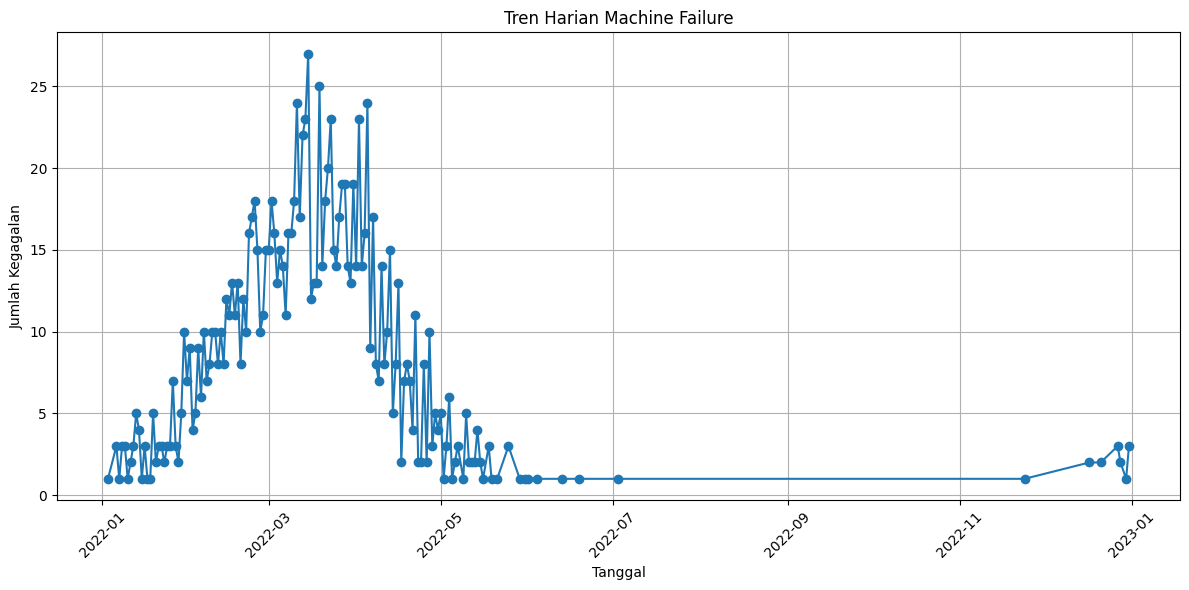

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(daily_trend['Date'], daily_trend['Failure_Count'], marker='o')
plt.title('Tren Harian Machine Failure')
plt.xlabel('Tanggal')
plt.ylabel('Jumlah Kegagalan')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
df['Year'] = 2022  # atau sesuaikan tahunnya jika ada banyak tahun
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])


In [ ]:
df_downtime = df[df['Downtime'] == 'Machine_Failure']


In [ ]:
df_downtime['Month_Year'] = df_downtime['Date'].dt.to_period('M').astype(str)


<ipython-input-19-81000945>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_downtime['Month_Year'] = df_downtime['Date'].dt.to_period('M').astype(str)


In [ ]:
monthly_trend = df_downtime.groupby('Month_Year').size().reset_index(name='Failure_Count')


<ipython-input-21-2702383145>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=monthly_trend, x='Month_Year', y='Failure_Count', palette='Blues_d')


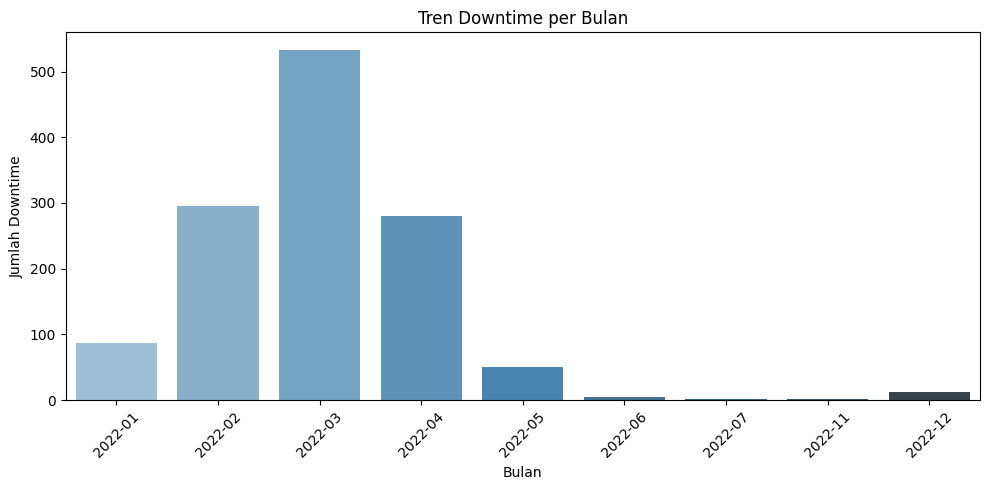

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.barplot(data=monthly_trend, x='Month_Year', y='Failure_Count', palette='Blues_d')
plt.title('Tren Downtime per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Downtime')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
